1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

In SLR, for a given value of 𝑋X is assumed to be normally distributed with a mean of 𝛽0+𝛽1𝑋 and some variance 𝜎^2. This makes the observed data points (Y) a sample from a normal distribution centered around the line defined by 𝛽0+𝛽1𝑋β.

chatbot link:https://chatgpt.com/share/672edd85-d960-8004-bd20-eeddbd5aca80

Here's a quick summary of our conversation so far:

You mentioned that you're studying university-level economics, with a focus on competition in the tech industry and monopolies.
I provided a Python code example that uses NumPy and SciPy to demonstrate monopoly and competitive pricing. The example includes functions for demand, revenue, cost, and profit, showing how a monopolist can maximize profits by setting a higher price, while competitive markets drive prices down to marginal costs.

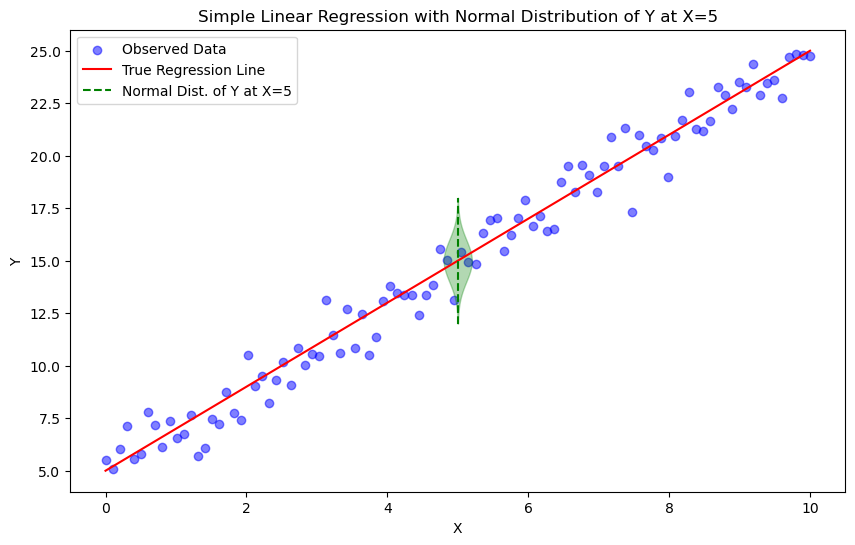

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)
beta_0 = 5
beta_1 = 2
sigma = 1

X = np.linspace(0, 10, 100)

epsilon = np.random.normal(0, sigma, X.size)
Y = beta_0 + beta_1 * X + epsilon

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Observed Data", color="blue", alpha=0.5)
plt.plot(X, beta_0 + beta_1 * X, label="True Regression Line", color="red")

x_val = 5
y_mean = beta_0 + beta_1 * x_val
y_values = np.linspace(y_mean - 3 * sigma, y_mean + 3 * sigma, 100)
pdf = norm.pdf(y_values, y_mean, sigma)

plt.plot([x_val] * len(y_values), y_values, 'g--', label=f"Normal Dist. of Y at X={x_val}")
plt.fill_betweenx(y_values, x_val - pdf * 0.5, x_val + pdf * 0.5, color='green', alpha=0.3)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Simple Linear Regression with Normal Distribution of Y at X=5")
plt.show()


2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

chatbot link: https://chatgpt.com/share/672ee2ad-097c-8004-85a2-f670f581479e

In our conversation, we discussed creating and visualizing a Simple Linear Regression model using simulated data in Python. We outlined a process to:

Generate simulated data for variables x and Y, where Y is linearly related to x with some added noise.
Combine x and Y into a pandas DataFrame named df.
Use statsmodels.formula.api to fit a Simple Linear Regression model (Y ~ x) and examine its summary.
Plot the data points along with the fitted regression line to visualize the model’s accuracy.
Let me know if you need any more guidance!

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1270.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           6.76e-58
Time:                        04:16:20   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4443      0.387     14.083      0.0

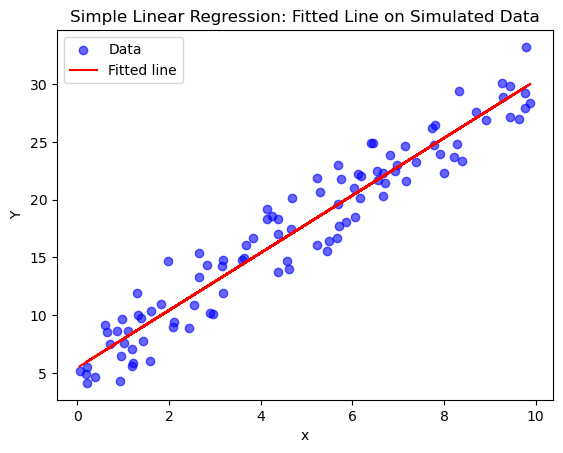

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
x = np.random.rand(n) * 10
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, n)
Y = true_intercept + true_slope * x + noise

df = pd.DataFrame({'x': x, 'Y': Y})

model = smf.ols('Y ~ x', data=df).fit()

print(model.summary())

plt.scatter(df['x'], df['Y'], label="Data", color='blue', alpha=0.6)
plt.plot(df['x'], model.predict(df), color='red', label="Fitted line")
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.title('Simple Linear Regression: Fitted Line on Simulated Data')
plt.show()


3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

In essence, the difference between the lines illustrates sampling variation: the true line is fixed, while the fitted line is a sample-specific estimate influenced by the randomness in our data sample.

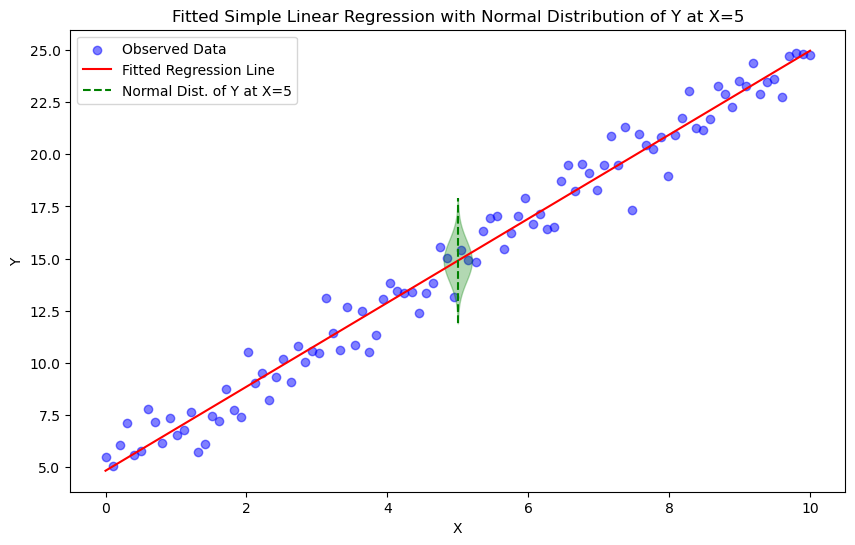

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import norm

np.random.seed(42)
beta_0 = 5
beta_1 = 2
sigma = 1

X = np.linspace(0, 10, 100)
epsilon = np.random.normal(0, sigma, X.size)
Y = beta_0 + beta_1 * X + epsilon

data = pd.DataFrame({'X': X, 'Y': Y})

model = smf.ols('Y ~ X', data=data).fit()
data['Y_pred'] = model.predict(data['X'])

plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label="Observed Data", color="blue", alpha=0.5)
plt.plot(data['X'], data['Y_pred'], label="Fitted Regression Line", color="red")

x_val = 5
y_mean = model.params['Intercept'] + model.params['X'] * x_val
y_values = np.linspace(y_mean - 3 * sigma, y_mean + 3 * sigma, 100)
pdf = norm.pdf(y_values, y_mean, sigma)

plt.plot([x_val] * len(y_values), y_values, 'g--', label=f"Normal Dist. of Y at X={x_val}")
plt.fill_betweenx(y_values, x_val - pdf * 0.5, x_val + pdf * 0.5, color='green', alpha=0.3)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Fitted Simple Linear Regression with Normal Distribution of Y at X=5")
plt.show()


4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

Suppose the values in fitted_model.params were:

Intercept = 5
Slope = 2
Then, for an observed X value of 3, the fitted value Y-hat would be:

𝑌-hat = 5+(2×3)=5+6=11
This process is repeated for each observation to generate the full array of fitted values in fitted_model.fittedvalues.

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

In the OLS method, the line chosen for a fitted model minimizes the sum of the squared differences residuals between the observed values and the line's predicted values.

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

R^2 (whether obtained via fitted_model.rsquared or through np.corrcoef(...)[0,1]22 ) tells us how much of the variability in Y is explained by the regression model. This makes it a key indicator of model accuracy.

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

Linearity: The assumption of linearity states that there should be a linear relationship between the independent variable. However, upon visual inspection of the scatter plot, it appears that the relationship between fertilizer amount and crop yield may be nonlinear, with yield increasing at an accelerating rate as fertilizer usage increases. This suggests that a simple linear model may not be appropriate for this data, and a polynomial or other nonlinear regression might be more suitable.

Homoscedasticity (Constant Variance of Errors): This assumption requires that the variance of residuals (errors) should remain constant across all levels of the independent variable. The residuals histogram and scatter plot may indicate patterns of increasing variance with higher amounts of fertilizer, implying heteroscedasticity. This variance inconsistency violates the homoscedasticity assumption, suggesting that a transformation or a different modeling approach might be necessary.

chatbot link: https://chatgpt.com/share/672fb61e-475c-8004-bc53-d5c585ffa95d

We discussed how the assumptions of Simple Linear Regression might not hold for the provided data on fertilizer use and crop yield. Two key assumptions—**linearity** and **homoscedasticity**—appear incompatible with the data. The relationship between fertilizer and yield seems nonlinear, with yield increasing at an accelerating rate, indicating that a simple linear model may not fit well. Additionally, there may be **heteroscedasticity**, as residuals likely exhibit increasing variance with higher fertilizer levels. This suggests that a different modeling approach, perhaps nonlinear regression, may be more suitable.

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

After running this model, we’ll interpret the p-value for the slope coefficient to decide whether the data provide evidence of a linear association between waiting time and eruption duration in the Old Faithful Geyser dataset. If the p-value is small, we would have reason to believe that waiting time is associated with eruption duration. If the p-value is large, it suggests that any observed association could be due to random variation rather than a true relationship.

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

If the relationship between waiting time and eruption duration observed in the full dataset weakens as we restrict the data to shorter wait times, we might find larger p-values, indicating insufficient evidence to reject the null hypothesis. This would suggest that the association between waiting time and duration primarily holds for longer waiting periods. However, if the p-values remain small, this would indicate that the relationship persists even within shorter waiting times. By testing each short_wait_limit (62, 64, and 66 minutes), we can observe how the strength of evidence against the null hypothesis changes as we adjust the wait time threshold.

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

simulate samples (of size n=160) from a Simple Linear Regression model that uses  𝛽0=1.65
 ,  𝛽1=0
 ,  𝜎=0.37
  along with the values of waiting for  𝑥
  to create simuations of  𝑌
  and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

report if  0
  is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

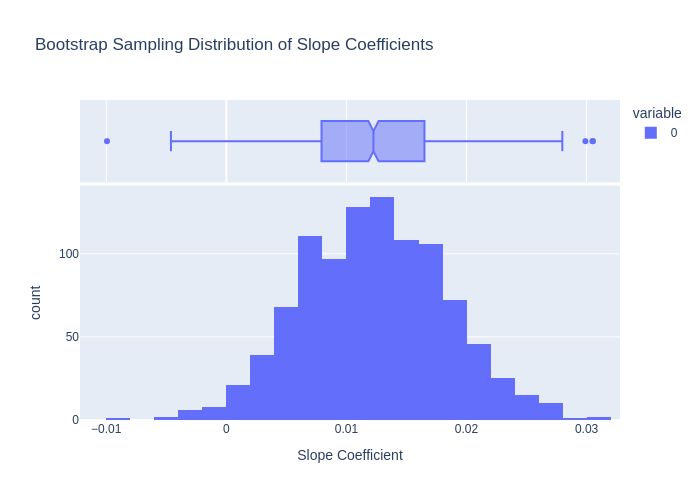

In [5]:
# 1
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px
from scipy.stats import norm

old_faithful = sns.load_dataset('geyser')

long_wait_limit = 71
long_wait_data = old_faithful[old_faithful['waiting'] > long_wait_limit]

n_bootstraps = 1000
bootstrap_slopes = []

for _ in range(n_bootstraps):
    bootstrap_sample = long_wait_data.sample(n=160, replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(bootstrap_model.params['waiting'])

fig_bootstrap = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrap Sampling Distribution of Slope Coefficients",
                             labels={'value': 'Slope Coefficient'}, marginal="box")
fig_bootstrap.show(renderer="png")


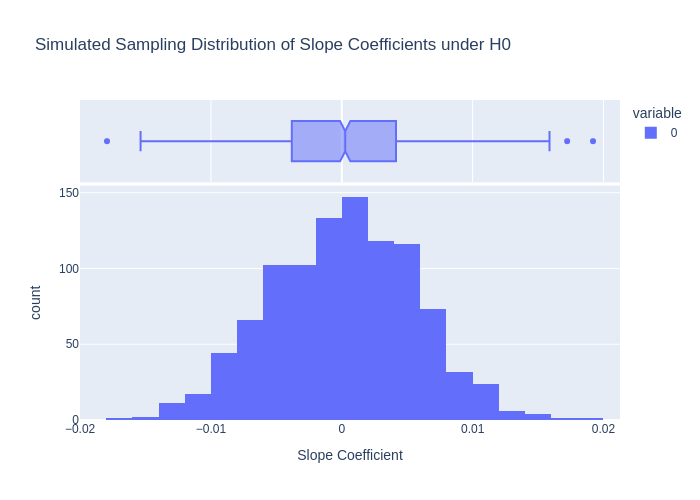

In [6]:
# 2
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

null_slopes = []

for _ in range(1000):
    simulated_Y = beta_0 + beta_1 * long_wait_data['waiting'].values + np.random.normal(0, sigma, size=160)
    simulated_data = pd.DataFrame({'waiting': long_wait_data['waiting'].values, 'duration': simulated_Y})
    simulated_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slopes.append(simulated_model.params['waiting'])

fig_null = px.histogram(null_slopes, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients under H0",
                        labels={'value': 'Slope Coefficient'}, marginal="box")
fig_null.show(renderer="png")


In [7]:
# 3
lower_ci, upper_ci = np.percentile(bootstrap_slopes, [2.5, 97.5])
contains_zero = lower_ci <= 0 <= upper_ci

actual_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
actual_p_value = actual_model.pvalues['waiting']

bootstrap_p_value = np.mean([slope <= 0 for slope in bootstrap_slopes])

print("95% Bootstrapped Confidence Interval for Slope Coefficients:", (lower_ci, upper_ci))
print("Contains 0:", contains_zero)
print("Bootstrap p-value (proportion of slopes <= 0):", bootstrap_p_value)
print("Actual model's p-value from summary:", actual_p_value)


95% Bootstrapped Confidence Interval for Slope Coefficients: (0.0010650852694727494, 0.024357866884767272)
Contains 0: False
Bootstrap p-value (proportion of slopes <= 0): 0.017
Actual model's p-value from summary: 0.038135755338567744


11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length

 - Continuous vs. Categorical: The original models analyzed the effect of each additional minute of waiting time on eruption duration, while the current model only examines average duration differences between two distinct categories.
 - Interpretation ofβ contrast: In the current model, β contrast represents the difference in average duration between "long" and "short" wait times, which is a simpler, categorical interpretation compared to a continuous slope.
This approach allows for an understanding of how eruption duration differs in broad categories of wait times, without analyzing variations within the "short" or "long" categories themselves.

12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

Model 1 (All Data with Slope) is the only model where the residuals appear reasonably close to a normal distribution, supporting the normality assumption. The other three models show deviations that make the normality assumption less plausible:

Model 2 lacks symmetry and has a narrow distribution due to a restricted data range.
Model 3 is skewed with potential outliers.
Model 4 is non-symmetrical and deviates from normality due to the use of an indicator variable.
In summary, Model 1’s residuals support the normality assumption best, while Models 2, 3, and 4 exhibit distributions that are less aligned with normality.

13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations

A) Intuition:
The permutation test essentially evaluates whether the observed difference in means could be due to random chance. By shuffling labels, we create a sampling distribution that reflects what differences in means might look like if there were no true difference between the "short" and "long" groups.
B)The bootstrap approach builds a distribution of possible mean differences based on the observed data, reflecting the sampling variability we might expect if we were to collect repeated samples. The resulting confidence interval tells us a range of plausible values for the true difference in means. If this interval does not contain zero, we have evidence that the difference in means is statistically significant.
a) Permutation Test: By shuffling labels and recalculating the mean difference, the permutation test assesses whether the observed difference could be due to random assignment of groups, simulating the distribution of mean differences under the null hypothesis.
b) Bootstrap Confidence Interval: By resampling within each group and calculating the difference in means, the bootstrap approach provides an empirical estimate of the sampling distribution of the mean difference. This allows us to construct a confidence interval, which gives a range of values for the difference in means based on the observed data's inherent variability.

14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

In [ ]:
yes